In [12]:
import os
import glob
import cv2
import numpy as np
from matplotlib import pyplot as plt
import json

C:\Users\kirti\AppData\Local\Temp\ipykernel_32932\3337153972.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  image_dataset = np.array(images)
C:\Users\kirti\AppData\Local\Temp\ipykernel_32932\3337153972.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  segment_dataset = np.array(segments)


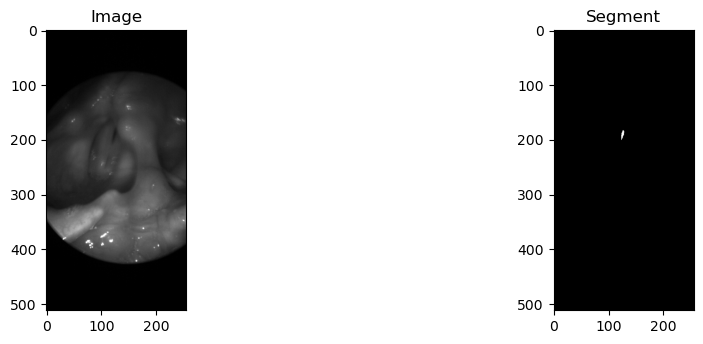

Video Id = 251
Camera = KayPentax HSV 9710 (Photron)
Sampling rate (Hz) = 4000
Video resolution (px, HxW) = [512, 256]
Color = False
Endoscope orientation = 70°
Endoscope application = oral
Age range (yrs) = 10-20
Subject sex = w
Subject disorder status = healthy
Segmenter = 0
Post-processed = 2


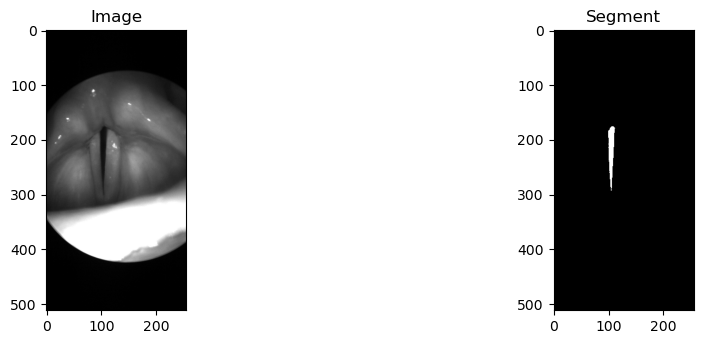

Video Id = 575
Camera = KayPentax HSV 9710 (Photron)
Sampling rate (Hz) = 4000
Video resolution (px, HxW) = [320, 256]
Color = False
Endoscope orientation = 70°
Endoscope application = oral
Age range (yrs) = 10-20
Subject sex = W
Subject disorder status = Posterior insufficient glottic closure
Segmenter = 1
Post-processed = 2


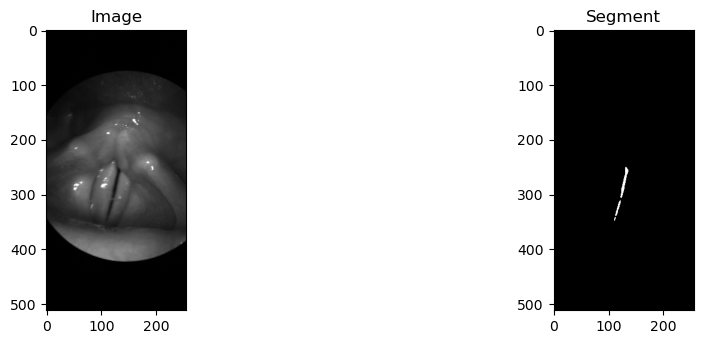

Video Id = 548
Camera = KayPentax HSV 9710 (Photron)
Sampling rate (Hz) = 4000
Video resolution (px, HxW) = [512, 256]
Color = False
Endoscope orientation = 70°
Endoscope application = oral
Age range (yrs) = 60-70
Subject sex = w
Subject disorder status = Muscle tension dysphonia with M. thyroarythaenoideus atrophy
Segmenter = 0
Post-processed = 1


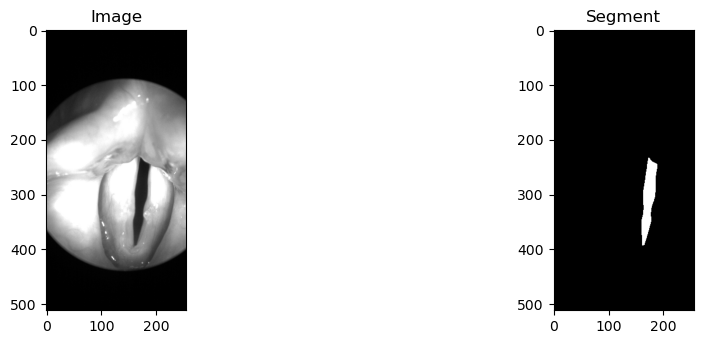

Video Id = 289
Camera = KayPentax HSV 9710 (Photron)
Sampling rate (Hz) = 4000
Video resolution (px, HxW) = [512, 256]
Color = False
Endoscope orientation = 70°
Endoscope application = oral
Age range (yrs) = 30-40
Subject sex = w
Subject disorder status = Muscle tension dysphonia with nodules
Segmenter = 0
Post-processed = 2


In [13]:
#Homework 3 (Task 1)

image_names = glob.glob("C:/Users/kirti/Documents/FAU Exercises and Lectures/Semester 3/DSSS/Exercises/Mini_BAGLS_dataset/Mini_BAGLS_dataset/*[!_seg].png")
image_names.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))

images = [cv2.imread(image, 1) for image in image_names]
image_dataset = np.array(images)

segment_names = glob.glob("C:/Users/kirti/Documents/FAU Exercises and Lectures/Semester 3/DSSS/Exercises/Mini_BAGLS_dataset/Mini_BAGLS_dataset/*[_seg].png")
segment_names.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))

segments = [cv2.imread(segment, 1) for segment in segment_names]
segment_dataset = np.array(segments)

train_meta = []
for directory_path in glob.glob("C:/Users/kirti/Documents/FAU Exercises and Lectures/Semester 3/DSSS/Exercises/Mini_BAGLS_dataset/Mini_BAGLS_dataset"):
    for meta_path in glob.glob(os.path.join(directory_path,"*.meta")):
        myjsonfile = open(meta_path,'r')
        jsondata = myjsonfile.read()
        train_meta.append(jsondata)
        
train_meta = np.array(train_meta)

import random

for x in range(4):
    img_number = random.randint(0, len(image_dataset)-1)
    img = image_dataset[img_number]
    seg = segment_dataset[img_number]
    meta = train_meta[img_number]

    plt.figure(figsize=(12,8))
    plt.subplot(221)
    plt.title('Image')
    plt.imshow(img)
    plt.subplot(222)
    plt.title('Segment')
    plt.imshow(seg)
    plt.show()
    
    data = json.loads(meta)
    print('Video Id = '+ str(data['Video Id']))
    print('Camera = ' + str(data['Camera']))
    print('Sampling rate (Hz) = ' + str(data['Sampling rate (Hz)']))
    print('Video resolution (px, HxW) = ' + str(data['Video resolution (px, HxW)']))
    print('Color = ' + str(data['Color']))
    print('Endoscope orientation = ' + str(data['Endoscope orientation']))
    print('Endoscope application = ' + str(data['Endoscope application']))
    print('Age range (yrs) = ' + str(data['Age range (yrs)']))
    print('Subject sex = ' + str(data['Subject sex']))
    print('Subject disorder status = ' + str(data['Subject disorder status']))
    print('Segmenter = ' + str(data['Segmenter']))
    print('Post-processed = ' + str(data['Post-processed']))


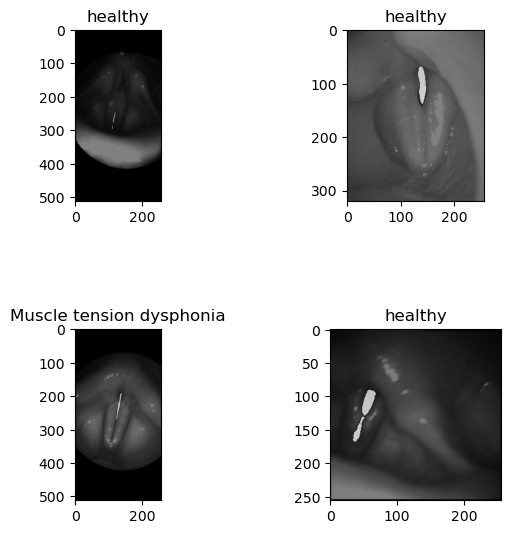

In [14]:
#Homework 3 (Task 2)

overlaid_images = []
images_title = []
for x in range(4): 
    img_number1 = random.randint(0, len(image_dataset)-1)
    img1 = image_dataset[img_number1]
    seg1 = segment_dataset[img_number1]
    meta1 = train_meta[img_number1]

    dst = cv2.addWeighted(img1, 0.5, seg1, 0.7, 0)
    overlaid_images.append(dst)
    data1 = json.loads(meta1)
    images_title.append((data1['Subject disorder status']))


fig,a =  plt.subplots(2,2)    

a[0][0].imshow(overlaid_images[0])
a[0][0].set_title(images_title[0])
a[0][1].imshow(overlaid_images[1])
a[0][1].set_title(images_title[1])
a[1][0].imshow(overlaid_images[2])
a[1][0].set_title(images_title[2])
a[1][1].imshow(overlaid_images[3])
a[1][1].set_title(images_title[3])
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.75, wspace=0.5)

Text(0.5, 1.0, 'Luminosity')

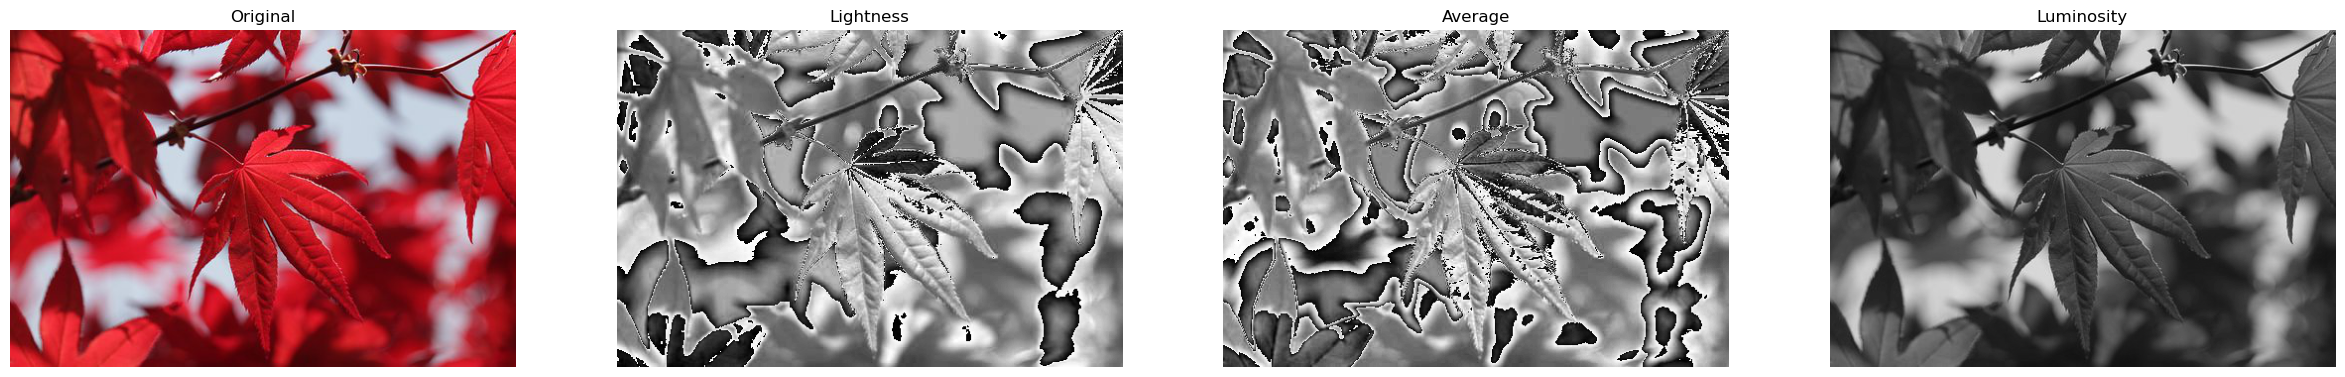

In [15]:
#Homework 3 (Task 3)

overlaid_images = []
images_title = []
for x in range(4): 
    img_number1 = random.randint(0, len(image_dataset)-1)
    img1 = image_dataset[img_number1]
    seg1 = segment_dataset[img_number1]
    meta1 = train_meta[img_number1]

    dst = cv2.addWeighted(img1, 0.5, seg1, 0.7, 0)
    overlaid_images.append(dst)
    data1 = json.loads(meta1)
    images_title.append((data1['Subject disorder status']))


fig,a =  plt.subplots(2,2)    

a[0][0].imshow(overlaid_images[0])
a[0][0].set_title(images_title[0])
a[0][1].imshow(overlaid_images[1])
a[0][1].set_title(images_title[1])
a[1][0].imshow(overlaid_images[2])
a[1][0].set_title(images_title[2])
a[1][1].imshow(overlaid_images[3])
a[1][1].set_title(images_title[3])
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.75, wspace=0.5)
import matplotlib.image as mpimg
import numpy as np

rgb_img = mpimg.imread("C:/Users/kirti/Documents/FAU Exercises and Lectures/Semester 3/DSSS/Exercises/leaves.jpg")
R, G, B = rgb_img[:,:,0], rgb_img[:,:,1], rgb_img[:,:,2]

# Lightness Method
imgGray_light = (np.minimum(R, np.minimum(G, B)) + np.maximum(R, np.maximum(G, B))) / 2

# Average  Method
imgGray_avg = (R + G + B)/3

# Luminosity Method
imgGray_lumi = 0.2989 * R + 0.5870 * G + 0.1140 * B

fig = plt.figure(figsize=(30, 40))

rows = 1
columns = 4

fig.add_subplot(rows, columns, 1)

plt.imshow(rgb_img, cmap='gray')
plt.axis('off')
plt.title("Original")

fig.add_subplot(rows, columns, 2)

plt.imshow(imgGray_light, cmap='gray') 
plt.axis('off')
plt.title("Lightness")

fig.add_subplot(rows, columns, 3)

plt.imshow(imgGray_avg, cmap='gray')
plt.axis('off')
plt.title("Average")

fig.add_subplot(rows, columns, 4)
plt.imshow(imgGray_lumi, cmap='gray') 
plt.axis('off')
plt.title("Luminosity")


Text(0.5, 1.0, 'Luminosity')

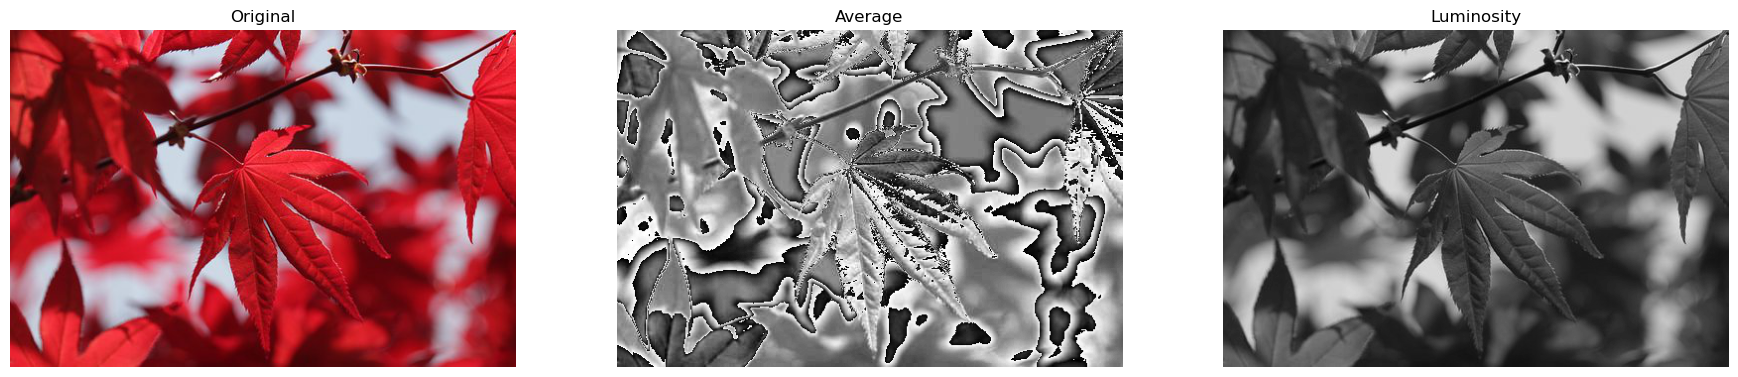

In [8]:
import matplotlib.image as mpimg

rgb_img = mpimg.imread('C:/Users/kirti/Documents/FAU Exercises and Lectures/Semester 3/DSSS/Exercises/leaves.jpg')

R, G, B = rgb_img[:,:,0], rgb_img[:,:,1], rgb_img[:,:,2]

# Lightness Method
# max_rgb = np.amax([np.amax(rgb_img[:,:,0]), np.amax(rgb_img[:,:,1]), np.amax(rgb_img[:,:,2])])
# min_rgb = np.amin([np.amin(rgb_img[:,:,0]), np.amin(rgb_img[:,:,1]), np.amin(rgb_img[:,:,2])])

# imgGray_light = (max_rgb + min_rgb)/2

# Average  Method
imgGray_avg = (R + G + B)/3

# Luminosity Method
imgGray_lumi = 0.2989 * R + 0.5870 * G + 0.1140 * B

# fig,arr =  plt.subplots(2,2)    

# arr[0][0].imshow(rgb_img, cmap='gray')
# arr[0][0].set_title('Original')
# arr[0][1].imshow(imgGray_avg, cmap='gray')
# arr[0][1].set_title('Average')
# arr[1][0].imshow(imgGray_lumi, cmap='gray')
# arr[1][0].set_title('Luminosity')
# arr[1][1].imshow(imgGray_lumi, cmap='gray')
# arr[1][1].set_title('Luminosity')
# plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.75, wspace=0.5)


fig = plt.figure(figsize=(30, 40))

rows = 1
columns = 4

fig.add_subplot(rows, columns, 1)

plt.imshow(rgb_img, cmap='gray')
plt.axis('off')
plt.title("Original")

fig.add_subplot(rows, columns, 2)

plt.imshow(imgGray_avg, cmap='gray')
plt.axis('off')
plt.title("Average")

fig.add_subplot(rows, columns, 3)

plt.imshow(imgGray_lumi, cmap='gray')
plt.axis('off')
plt.title("Luminosity")

# fig.add_subplot(imgGray_lumi, columns, 4)

# plt.imshow(imgGray_lumi, cmap='gray')
# plt.axis('off')
# plt.title("Luminosity")
